                             ARIMA Model Results                              
Dep. Variable:        D.Precio_por_m2   No. Observations:                   88
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -565.233
Method:                       css-mle   S.D. of innovations            149.000
Date:                Sun, 24 Jan 2021   AIC                           1136.465
Time:                        17:24:00   BIC                           1143.897
Sample:                    04-01-1998   HQIC                          1139.459
                         - 01-01-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    22.3628     12.854      1.740      0.085      -2.830      47.556
ma.L1.D.Precio_por_m2    -0.1931      0.101     -1.921      0.058      -0.390       0.004
        

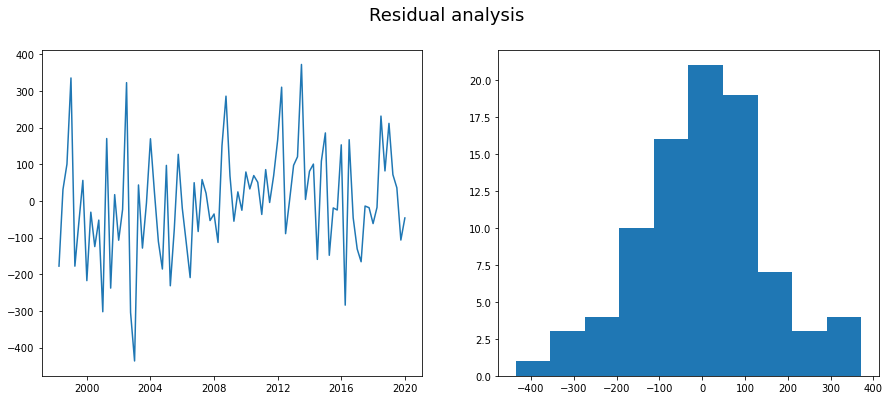

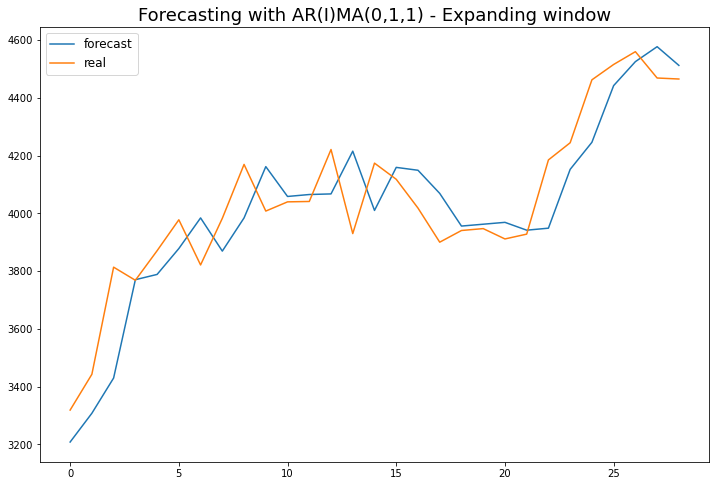

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

lima_serie = pd.read_excel('../input/series_bcrp/lima_serie.xlsx')
date_index = pd.date_range(start='01/01/1998', end='01/04/2020', freq='QS')

lima_serie.index = date_index

#All the statistical tests were made on RScript in /arima_analysis.R.
#We follow that the order of ARIMA in lima_series is (1,0,1). It's only capable to forecast 1 period.

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(lima_serie['Precio_por_m2'], order=(0,1,1))
model_fit = model.fit()

print(model_fit.summary())

#We store the residuals:
residuals = pd.DataFrame({'residuals':model_fit.resid})

#Graph
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Residual analysis', fontsize=18)
ax1=ax1.plot(residuals)
ax2=ax2.hist(residuals)

#Backtesting the arima model.
n_train = 60
series = lima_serie['Precio_por_m2']
n_records = len(series)

date_fcst = []
forecasts = []
actual_fcst = []

#Walk Forward testing: Expanding window
for i in range(n_train, n_records):
    train, test = series[0:i].values, series[i:i+1].values
    
    idx_train, idx_test = series[0:i].index, series[i:i+1].index
    model = ARIMA(train, order=(0,1,1))
    model_fit = model.fit()
    
    fcst = model_fit.forecast(steps=1)[0][0]
    date_fcst.append(idx_test[0])
    forecasts.append(fcst)
    actual_fcst.append(test[0])

data_backtest_expanding = pd.DataFrame({'date':date_fcst, 'forecast':forecasts,'real':actual_fcst})

#Plotting results:
plt.figure(figsize=(12,8))
data_backtest_expanding['forecast'].plot()
data_backtest_expanding['real'].plot()
plt.title('Forecasting with AR(I)MA(0,1,1) - Expanding window', fontsize=18)
plt.legend(['forecast','real'],fontsize=12)
plt.show()

#Walk Forward testing: Rolling window

#date_fcst = []
#forecasts = []
#actual_fcst = []

#fixed_length = 60
#for n,i in enumerate(range(n_train, n_records)):
#    train, test = series[0+n:i+n].values, series[i+1:i+2].values

#    idx_train, idx_test = series[0+n:i+n].values, series[i+1:i+2].values
#    model = ARIMA(train, order=(0,0,1))
#    model_fit = model.fit()
#    fcst = model_fit.forecast()[0][0]
    
#    date_fcst.append(idx_test[0])
#    forecasts.append(fcst)
#    actual_fcst.append(test[0])

#data_backtest_rolling = pd.DataFrame({'date':date_fcst, 'forecast':forecasts,'real':actual_fcst})

In [4]:
#data_backtest_expanding

from var_utils.functions import forecasting_metric

metrics_dict = forecasting_metric(data_backtest_expanding['forecast'], data_backtest_expanding['real'], verbose=True)

---------------------------
| Métrica  | Valor:  |
---------------------------
| mape | 0.0286227401462183     |
| me | -28.782787292642784     |
| mae | 114.67824062605214     |
| mpe | -0.007141202916316155     |
| rmse | 144.77605053497993     |
| corr | 0.8920098297392701     |
| minmax | 0.028208771077830597     |
